In [1]:
import numpy as np
from skopt import gp_minimize

ImportError: dlopen(/Users/cranmer/anaconda/lib/python3.5/site-packages/scipy/special/_ufuncs.cpython-35m-darwin.so, 2): Library not loaded: /usr/local/lib/libgcc_s.1.dylib
  Referenced from: /Users/cranmer/anaconda/lib/python3.5/site-packages/scipy/special/_ufuncs.cpython-35m-darwin.so
  Reason: image not found

In [2]:
def f(x):
    return (np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) *
            np.random.randn() * 0.1)

res = gp_minimize(f, [(-2.0, 2.0)])

NameError: name 'gp_minimize' is not defined

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

In [4]:
res

          fun: -0.083001121176494719
    func_vals: array([ -4.41651803e-05,  -2.30318402e-02,  -1.34721534e-04,
         1.36745162e-02,  -1.51672119e-06,   1.20669030e-02,
        -8.13799744e-03,  -7.67451479e-05,  -4.46163779e-02,
         3.22401017e-02,   1.67084648e-05,  -2.55653993e-05,
        -7.23047352e-06,  -1.92891160e-06,   6.33715097e-06,
         1.89201459e-05,  -2.84384142e-06,   1.14087875e-03,
         2.68609437e-02,  -1.54661475e-05,   2.32776043e-05,
        -2.12290187e-02,   4.59415565e-02,  -6.03311538e-06,
        -3.88046981e-05,   1.29648623e-03,  -6.54282613e-05,
        -3.46044417e-03,  -3.29561786e-02,  -5.70939797e-05,
        -1.65544425e-02,   4.27641729e-05,  -8.82399760e-03,
        -1.78471895e-05,   9.49974843e-02,  -6.46104161e-02,
        -5.19927181e-02,  -3.55322068e-02,  -5.49439296e-02,
        -1.98773720e-02,   2.49445958e-05,  -2.67074543e-06,
        -8.30011212e-02,  -2.31210257e-05,   3.54137406e-02,
         3.32485286e-05,  -1.0383

In [6]:
from skopt.benchmarks import branin as branin

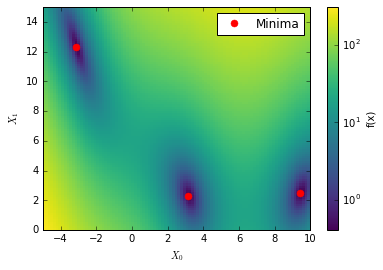

In [7]:
from matplotlib.colors import LogNorm

def plot_branin():
    fig, ax = plt.subplots()

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("$X_0$")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("$X_1$")
    ax.set_ylim([0, 15])

plot_branin()

In [11]:
from skopt.plots import plot_evaluations


/Users/cranmer/anaconda/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


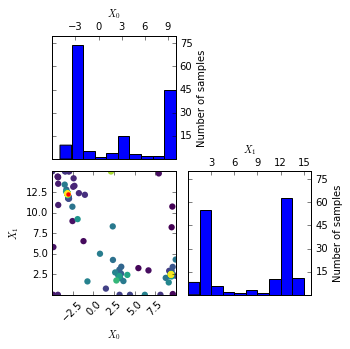

In [12]:
bounds = [(-5.0, 10.0), (0.0, 15.0)]
n_calls = 160

forest_res = gp_minimize(branin, bounds, n_calls=n_calls, random_state=4)

_ = plot_evaluations(forest_res, bins=10)